# Tutoriel débutant Python 2

### 2.1 Bref commentaire sur les modules en Python
> Les modules sont des regroupements de fonctions (ou classes) qui permettent d'utiliser ses dernières dans son script Python. Les prochaines cellules illustrent comment importer et utiliser des fonctions et des classes provenant de modules extérieurs. 
> Par exemple, le module *numpy* offre des objets en N-dimension de type array, des opérations d'algèbre linéaire ainsi que des transformés de Fourier.

In [1]:
import time
 
time.asctime() # nous appelons la fonction asctime du module time en 
    # écrivant le nom du module que nous avons importé suivie
    # d'un point et de la fonction que nous désirons utiliser.

'Tue Jun 25 22:17:58 2019'

In [2]:
import numpy as np # nous pouvons renommer les modules dans notre code
    # tel que nous pouvons les appeler avec ce nouveau nom. Nous utilisons
    # le mot-clé "as" dans ce cas

np.linspace(0.1, 10) # même situation que dans le cas précédent, mis
    # à part que nous utilisons notre nom np à la place de numpy
    # suivie du point et de la fonction que nous vous désirez

array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,  5.55510204,  5.75714286,  5.95918367,
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ])

In [3]:
from numpy import array # nous pouvons également importer seulement
    # des fonctions ou des classes particulières d'un module
    # avec le keyword import.

array([1,2,3,4]) # puisque nous avons directement importé la classe array
    # nous n'avons pas besoin d'écrire le nom du module suivi d'un point 
    # avant la classe.

array([1, 2, 3, 4])

### 2.2 Ouvrir des fichiers et comprendre sa position sur son disque dur en Python
> Le module $os$ permet d'interagir avec son système de fichiers, que ce soit sur Windows, ou bien sur Mac ou Linux. Ce module nous offre la possibilité d'ouvrir des fichiers qui sont dans différents dossiers. 

In [4]:
import os

In [5]:
os.getcwd() # imprime le dossier actuel de travail

'C:\\Users\\mystery\\Documents\\python_tutorials'

In [6]:
os.listdir() # imprimes les fichiers dans votre dossier actuel

['.ipynb_checkpoints',
 'answers_1.ipynb',
 'answers_2.ipynb',
 'beginner_workshop2.ipynb',
 'beginner_workshop_1.ipynb',
 'requirements.txt',
 'solutionnaire2.ipynb',
 'solutionnaire_1.ipynb',
 'starWarsClean.csv',
 'tutoriel_débutant2.ipynb',
 'tutoriel_débutant_1.ipynb']

> Un scénario habituel est l'ouverture d'un fichier dans un dossier spécifique. Nous allons ouvrir le fichier 'starWarsClean.csv' que vous pouvez télécharger [içi](https://drive.google.com/file/d/1XNGKtLzBacQaaP7PgPgyfBHc3Ux1nl2w/view?usp=sharing). J'assume qu'après téléchargement, ce fichier se trouve dans votre dossier téléchargement. Ce dossier correspond probablement à un emplacement similaire à cela:  
![path](https://i.ibb.co/kS9XkKR/image.png)  
Notez les "backwards slashes" (\) sur Windows. Tandis que sur Linux ou Mac, ce sont des "forwards slashes" (/). Donc on transcrirait ce path comme le suivant:

In [7]:
PATH = "C:\\Users\\mystery\\Downloads" # noter qu'il vaut doubler les BACKWARD SLASHES
filename = "starWarsClean.csv"

os.path.join(PATH, filename) # s'occupe des slashes automatiquement

'C:\\Users\\mystery\\Downloads\\starWarsClean.csv'

> Parfait, maintenant que nous somme capables d'avoir accès à des fichiers n'importe ou sur notre ordinateur, nous allons ouvrir le jeu de données.

### 2.3 Les DataFrame "Pandas"
> Le module pandas offre énormément de fonctionnalité pour les programmeurs jouant avec des jeux de données. Les DataFrame sont une composante intégrale de pandas qui correspond à une structure de données ayant des rangées ainsi que des colonnes. Les rangées, et les colonnes, sont identifiées par des noms. Nous pouvons ouvrir un fichier .csv directement en DataFrame avec la fonctionnalité "read_csv".

In [8]:
import pandas as pd

# ouvrir le fichier "starWarsClean.csv"
star_wars_data = pd.read_csv(os.path.join(PATH, filename))
'''
import io
from google.colab import files
uploaded = files.upload()
star_wars_data = pd.read_csv(io.StringIO(uploaded['starWarsClean.csv'].decode()))
'''

star_wars_data.head() # head() retourne les 5 premières rangées par défaut

,id,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
0,3292879998,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,24.0,NaN,High school degree
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,25.0,"$0 - $24,999",Bachelor degree
2,3292765271,Yes,No,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,Male,29.0,"$0 - $24,999",High school degree
3,3292763116,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,23.0,"$100,000 - $149,999",Some college or Associate degree
4,3292731220,Yes,Yes,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,...,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Male,29.0,"$100,000 - $149,999",Some college or Associate degree


#### 2.3.1 Les différentes façons d'accéder aux données dans un DataFrame

> La fonction employée dans la cellule précédente était *head()* qui affiche les 5 premières rangées par défaut, avec toutes les colonnes. Les fonctions *iloc* et *loc* nous donne plus de flexibilité. Ces fonctions sont basées sur les principes du _slicing_ et du _indexing_, vu précédemment.  
*iloc* nous permet d'accéder à nos données avec des indices (entrants numériques) tandis que *loc* nous permet d'accéder à nos données avec le nom des colonnes et des rangées.

In [9]:
# iloc fonctionne avec des valeurs numériques
star_wars_data.iloc[0] # retourne la première rangée

id                                         3292879998
Seen_StarWars                                     Yes
Fan                                               Yes
Han_Solo                               Very favorably
Luke_Skywalker                         Very favorably
Princess.Leia                          Very favorably
Anakin.Skywalker                       Very favorably
Obi_Wan                                Very favorably
Emperor_Palpatine                      Very favorably
Darth_Vader                            Very favorably
Lando_Calrissian                     Unfamiliar (N/A)
Boba.Fett                            Unfamiliar (N/A)
C3P0                                   Very favorably
R2D2                                   Very favorably
Jar_Jar_Binks                          Very favorably
Padme_Amidala                          Very favorably
Yoda                                   Very favorably
Who_shot_first       I don't understand this question
Gender                      

In [10]:
# iloc peut retourner plusieurs rangées avec des listes comme entrant
star_wars_data.iloc[[0,2,3]] # retourne la première, troisième ainsi que la quatrième rangée

,id,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
0,3292879998,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,24.0,NaN,High school degree
2,3292765271,Yes,No,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,Male,29.0,"$0 - $24,999",High school degree
3,3292763116,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,23.0,"$100,000 - $149,999",Some college or Associate degree


In [11]:
# iloc fonctionne également avec le slicing
star_wars_data.iloc[:5] # les 5 premières rangées ( l' équivalent de .head())

,id,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
0,3292879998,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,24.0,NaN,High school degree
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,25.0,"$0 - $24,999",Bachelor degree
2,3292765271,Yes,No,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,Male,29.0,"$0 - $24,999",High school degree
3,3292763116,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,23.0,"$100,000 - $149,999",Some college or Associate degree
4,3292731220,Yes,Yes,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,...,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Male,29.0,"$100,000 - $149,999",Some college or Associate degree


In [12]:
# iloc peut également être utilisé afin de retourner seulement certaines colonnes
star_wars_data.iloc[:5, :2] #retourne les deux premières colonnes des 5 premières rangées

,id,Seen_StarWars
0,3292879998,Yes
1,3292879538,No
2,3292765271,Yes
3,3292763116,Yes
4,3292731220,Yes


Dans l'exemple précédent 
```
star_wars_data.iloc[:5, :2]
```
Remarquez la virgule,  elle sépare les rangées des colonnes. La ligne suivante
```
star_wars_data.iloc[:, :]
```
retourne l'ensemble des données dans le DataFrame. La suivante
```
star_wars_data.iloc[0:1, 0:1]
```
retourne le premier élément (première rangée et première colonne).



In [13]:
star_wars_data.iloc[0:1, 0:1]

,id
0,3292879998


In [14]:
type(star_wars_data.iloc[0:1, 0:1]) # retourne en fait un DataFrame

pandas.core.frame.DataFrame

In [15]:
star_wars_data.iloc[0, 0] # même chose que la cellule précédente

3292879998

In [16]:
type(star_wars_data.iloc[0, 0]) # retourne la valeur dans cette case

numpy.int64

In [17]:
# on peut également donner des listes comme entrées
star_wars_data.iloc[[0,1,3], [4, 5]]

,Luke_Skywalker,Princess.Leia
0,Very favorably,Very favorably
1,NaN,NaN
3,Very favorably,Very favorably


> La fonction *loc* fonctionne avec des entrants en texte représentant le nom d'une rangée ou d'une colonne. 

In [18]:
star_wars_data.loc[[0, 1, 2]] # en fait içi, nos noms de rangées sont des numéros

,id,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
0,3292879998,Yes,Yes,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Male,24.0,NaN,High school degree
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,25.0,"$0 - $24,999",Bachelor degree
2,3292765271,Yes,No,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),...,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,Male,29.0,"$0 - $24,999",High school degree


In [19]:
star_wars_data.loc[:5, ['Fan', 'Princess.Leia']] # 5 première rangée et seulement 2 colonnes

,Fan,Princess.Leia
0,Yes,Very favorably
1,NaN,NaN
2,No,Somewhat favorably
3,Yes,Very favorably
4,Yes,Somewhat favorably
5,Yes,Very favorably


#### Exercice 1
> Affichez l'éducation du troisième usager dans notre DataFrame en utilisant la fonction _loc_.

In [20]:
def exercice1(entrant):
  x = None # modifier cette variable, vous pouvez en assigner plus
  return x

assert exercice1(star_wars_data) == 'High school degree'

AssertionError: 

#### Exercice 2
> Affichez les revenus de tous les usagers dans notre DataFrame en utilisant la fonction _loc_.

In [21]:
def exercice2(entrant):
    x = None
    return x

assert exercice2(star_wars_data).equals(pd.read_csv('starWarsClean.csv', usecols=['Household_Income']))

AttributeError: 'NoneType' object has no attribute 'equals'

### 2.4 Visualisation avec les DataFrames pandas
> Les DataFrame pandas nous offrent directement la possibilité de visualiser nos données de différentes façons. Nous pouvons utiliser la fonction _plot_ directement sur un DataFrame que nous avons défini. La visualisation avec le module pandas nécessite le module *matplotlib*. Le module *matplotlib* est fréquemment utilisé pour la visualisation, également sur d'autres structures de données que les DataFrames de pandas comme des listes ou des arrays numpy.

In [22]:
import matplotlib.pyplot as plt
import matplotlib
plt.close('all')

In [23]:
star_wars_data.loc[:, 'Han_Solo'].value_counts()

Very favorably                                 608
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han_Solo, dtype: int64

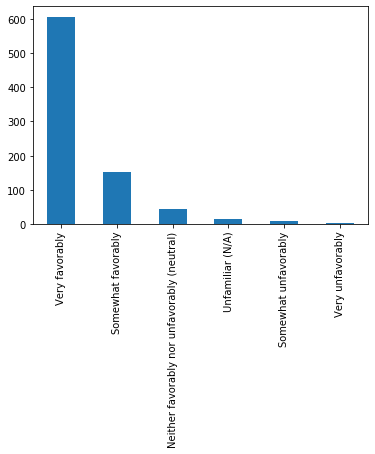

In [24]:
star_wars_data.loc[:, 'Han_Solo'].value_counts().plot(kind='bar')

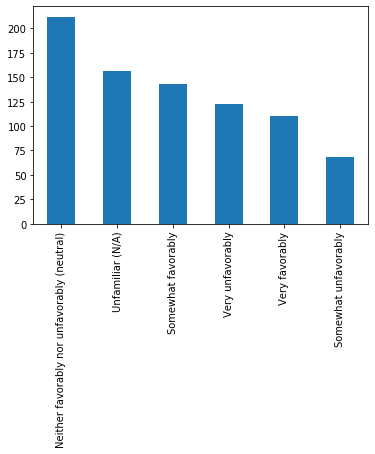

In [25]:
star_wars_data.loc[:, 'Emperor_Palpatine'].value_counts().plot(kind='bar')

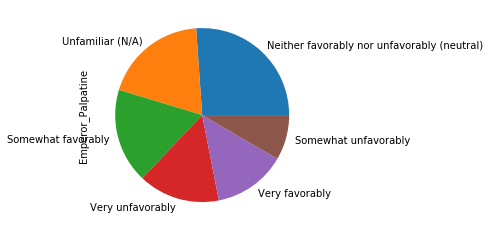

In [26]:
star_wars_data.loc[:, 'Emperor_Palpatine'].value_counts().plot(kind='pie')

> Nous allons concevoir un jeu de données aléatoires afin d'utiliser d'autres types de graphiques que ceux s'appliquant aux données catégoriques. Nous pourrions utiliser un vrai jeu de données, mais nous allons utiliser des données générer aléatoirement avec la fonction *randn* question d'efficacité.


In [27]:
import numpy as np
# 1000 données
x = np.random.randn(1000)
y = pd.date_range('1/1/2019', periods=1000)
df = pd.DataFrame(data=x, index=y)
# nous pouvons changer le nom des colonnes
df.columns = ['Valeur']
df.head()

,Valeur
2019-01-01,1.371630
2019-01-02,-0.120930
2019-01-03,0.536803
2019-01-04,-0.201482
2019-01-05,-0.245715


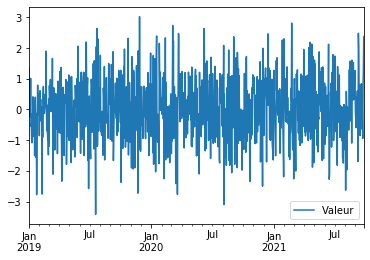

In [28]:
df.plot()

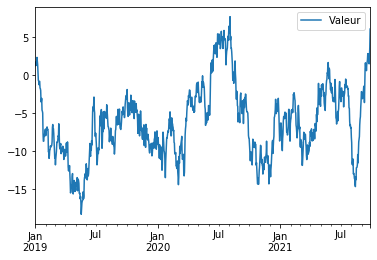

In [29]:
df = df.cumsum() # somme cumulative sur nos données
df.plot()

### 2.4 Plus d'outils avec matplotlib.pyplot
> Nous avons vu comment tracer des graphiques simples directement à partir d'un DataFrame. Par contre, quoique efficiente, cette façon est très limitée. Nous avons beaucoup plus d'options en utilisant les "subplots" de matplotlib.pyplot directement. Les avantages de matplotlib selon Wikipedia sont:  
* Export possible en de nombreux formats matriciels (PNG, JPEG...) et vectoriels (PDF, SVG...)  
* Documentation en ligne en quantité, nombreux exemples disponibles sur internet  
* Forte communauté très active  
* Interface pylab : reproduit fidèlement la syntaxe MATLAB  
* Bibliothèque haut niveau : idéale pour le calcul interactif  

> Deux autres packages pour la visualisation disponible en Python sont *plotly* et *seaborn*.  
Rajoutons désormais des descriptions pour nos axes, un titre et une légende à notre graphique. Nous pouvons même changer la taille de nos graphes.

Text(0.5, 1.0, 'Mon Graphe')

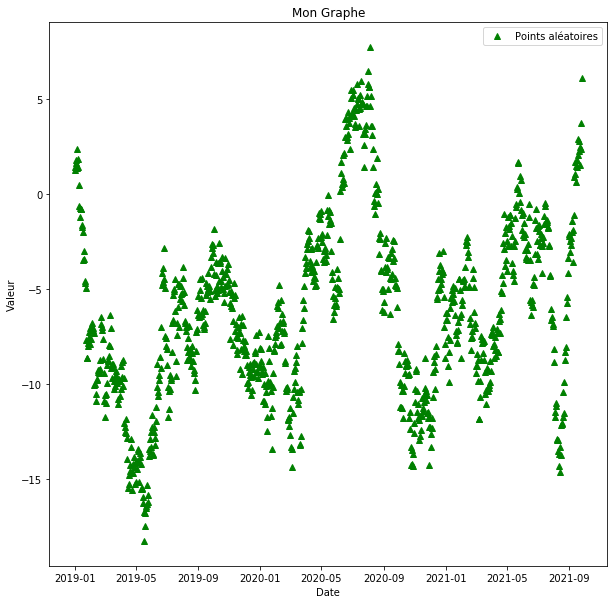

In [30]:
plt.figure(figsize=(10,10)) # modifier la taille de notre graphe. 
                # la taille défaut est 6.4 * 6.4 pouces
plt.plot(df, 'g^')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend(['Points aléatoires'])
plt.title('Mon Graphe')


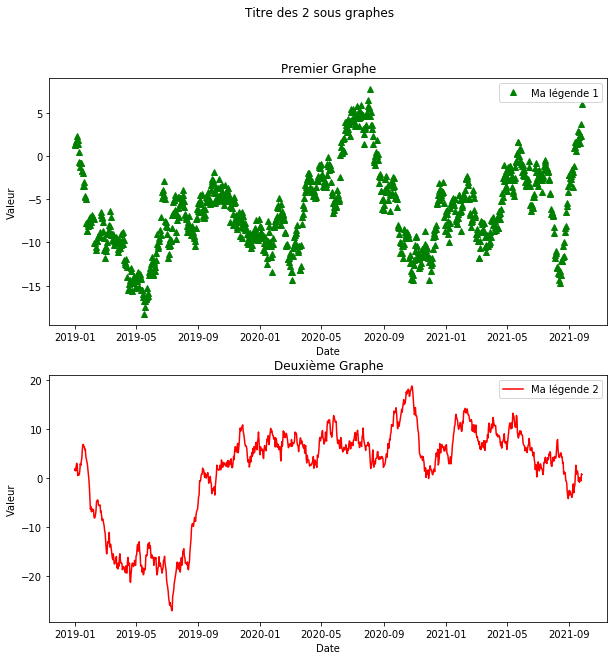

In [31]:
# créons un nouveau jeu de données pour pouvoir illustrer deux graphiques côtes à côtes
x2 = np.random.randn(1000) # 1000 données
df2 = pd.DataFrame(data=x2, index=y) # index est la rangée qui est les dates de plus tôt
df2 = df2.cumsum() # la somme cumulative sur nos données.

figure, axes = plt.subplots(2, 1, figsize=(10,10)) # 2 * 1 graphes avec la dimension spécifiée
# écrivons le titre de l'ensemble de graphe.
figure.suptitle('Titre des 2 sous graphes')

# retrouvons les axes de notre "subplots" qui représent des sous-graphes dans notre image
ax1 = axes[0]
ax2 = axes[1]

# affichons le premier dataframe en vert
ax1.plot(df, 'g^')

# affichons le deuxième dataframe en rouge
ax2.plot(df2, 'r-')


# écrivons les titres des sous graphes
ax1.set_title('Premier Graphe')
ax2.set_title('Deuxième Graphe')

# écrivons des descriptions des axes des sous graphes
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')

ax1.set_ylabel('Valeur')
ax2.set_ylabel('Valeur')

# écrivons des légendes
ax1.legend(['Ma légende 1'])
ax2.legend(['Ma légende 2'])




### 2.5 Statistiques descriptive avec les DataFrame pandas
> Nous pouvons directement générer une description qui résume notre jeu de données lorsqu'il est dans le format DataFrame. Par défaut, la description ciblera tous les colonnes numériques.

In [32]:
star_wars_data.describe()

,id,Age
count,1.184000e+03,1044.000000
mean,3.290131e+09,47.591954
std,1.054059e+06,18.205395
min,3.288375e+09,18.000000
25%,3.289457e+09,33.000000
50%,3.290149e+09,46.000000
75%,3.290816e+09,60.000000
max,3.292880e+09,85.000000


In [33]:
# nous pouvons également afficher d'autres types
# de données avec 'object' dans la liste à inclure
include = ['object', 'float', 'int']
star_wars_data.describe(include=include)

,Seen_StarWars,Fan,Han_Solo,Luke_Skywalker,Princess.Leia,Anakin.Skywalker,Obi_Wan,Emperor_Palpatine,Darth_Vader,Lando_Calrissian,...,C3P0,R2D2,Jar_Jar_Binks,Padme_Amidala,Yoda,Who_shot_first,Gender,Age,Household_Income,Education
count,1184,834,827,829,829,821,823,812,824,818,...,825,828,819,812,824,826,1044,1044.000000,856,1034
unique,2,2,6,6,6,6,6,6,6,6,...,6,6,6,6,6,3,2,NaN,5,5
top,Yes,Yes,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),...,Very favorably,Very favorably,Very unfavorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Female,NaN,"$50,000 - $99,999",Some college or Associate degree
freq,934,551,608,551,545,269,589,212,308,236,...,474,562,203,206,604,324,547,NaN,297,327
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.591954,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.205395,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN


#### Exercice 3
> Reproduisez l'image suivante: 
![e3](https://i.ibb.co/263BrW8/image.png)  
Tel que la taille est de 9 pouces * 9 pouces, les points sont des cercles, la couleur des points est jaune et on voit les informations (axes, légende..) sur l'image. Prenez notre jeu de données _df_. Évidemment vos points seront différents puisque le jeu de données est simulé aléatoirement.

In [34]:
# remplissez l'exercice 3 içi

